In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization





In [8]:
dataset = 'D:\KidsLearningML\imagesdata - Copy'
train_folder = os.path.join(dataset,"train")
test_folder = os.path.join(dataset,"test")


In [9]:
def count_files(rootdir):
    '''counts the number of files in each subfolder in a directory'''
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files in " + \
            str(path.name))
 
count_files(os.path.join(train_folder))

There are 200 files in apple
There are 200 files in banana
There are 200 files in bean
There are 200 files in cabbage
There are 200 files in carrot
There are 200 files in cucumber
There are 200 files in daisy
There are 200 files in mango
There are 200 files in orange
There are 200 files in papaya
There are 200 files in potato
There are 200 files in rose
There are 200 files in sunflower
There are 200 files in tomato
There are 200 files in tulip
There are 200 files in watermelon


In [10]:
def count_files(rootdir):
    '''counts the number of files in each subfolder in a directory'''
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files in " + \
            str(path.name))
 
count_files(os.path.join(test_folder))

There are 65 files in apple
There are 65 files in banana
There are 65 files in bean
There are 65 files in cabbage
There are 65 files in carrot
There are 65 files in cucumber
There are 65 files in daisy
There are 65 files in mango
There are 65 files in orange
There are 65 files in papaya
There are 65 files in potato
There are 65 files in rose
There are 65 files in sunflower
There are 65 files in tomato
There are 65 files in tulip
There are 65 files in watermelon


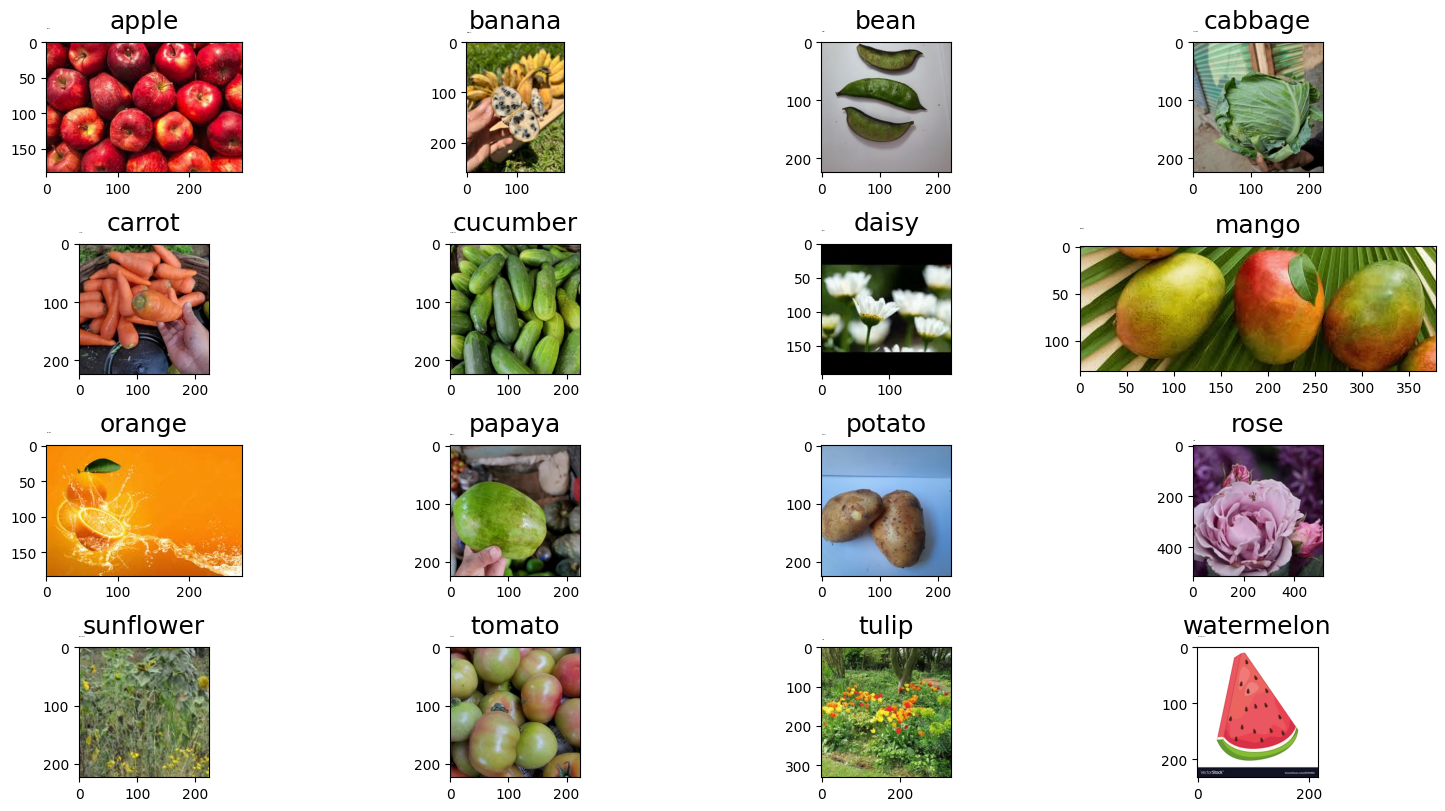

In [11]:
images = []
class_names = sorted(os.listdir(train_folder))
for class_name in class_names:
    class_path = os.path.join(train_folder, class_name)
    if os.path.isdir(class_path):
        food_selected = np.random.choice(os.listdir(class_path))
        images.append(os.path.join(class_path, food_selected))

fig = plt.figure(1, figsize=(15, 10))
for subplot, image_ in enumerate(images):
    category = os.path.basename(os.path.dirname(image_))
    imgs = plt.imread(image_)
    a, b, c = imgs.shape
    fig = plt.subplot(5, 4, subplot + 1)
    fig.set_title(category, pad=10, size=18)
    plt.imshow(imgs)
    plt.text(0, -20, category, fontsize=1 )
    plt.tight_layout()

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image
from keras.models import load_model

# Hyperparameters (adjusted for overfitting prevention)
target_size = (224, 224)
NUM_CLASSES = 16
batch_size = 16  # Reduced batch size
epochs = 30  # Increased epochs for potential longer convergence
learning_rate = 1e-5  # Lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Load pre-trained model with more layers frozen
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False, weights='imagenet', input_shape=target_size + (3,)
)
for layer in base_model.layers[:50]:  # Freeze only the first 50 layers
    layer.trainable = False

# Add classifier layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    
    layers.Dropout(0.5),  # Increased dropout
    layers.Dense(256, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compile with adjusted optimizer and learning rate
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy', metrics=['accuracy'])

# Enhanced data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=45,  # Increased rotation range
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    fill_mode='nearest',
     
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and augment data
train_generator = train_datagen.flow_from_directory(
    train_folder,  # Replace with your train data path
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_folder,  # Replace with your test data path
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Callbacks with even earlier stopping
model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath="D:/KidsLearningML/best_model.h5",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

early_stopping_callback = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=3,  # Reduced patience to 2 epochs
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    callbacks=[model_checkpoint_callback, early_stopping_callback],
    steps_per_epoch=len(train_generator)  # Ensure all images are used
)
best_model = tf.keras.models.load_model("D:/KidsLearningML/best_model.h5")

# Plot accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Found 3200 images belonging to 16 classes.
Found 1040 images belonging to 16 classes.
Epoch 1/30
200/200 [==============================] - ETA: 0s - loss: 3.6765 - accuracy: 0.0847

TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.

In [ ]:
# After training is complete, save the model to a file

model.save('final_model.h5')  # Replace with your desired filename


In [ ]:
import tensorflow as tf
import numpy as np

# Load the saved model (replace with your actual path)
model = tf.keras.models.load_model('final_model.h5')

# Prepare image for prediction
def load_image(path):
    # Use a suitable image loading library (e.g., OpenCV, Pillow)
    img = tf.keras.preprocessing.image.load_img(path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_preprocessed = img_batch / 255.0  # Normalize pixel values
    return img_preprocessed

# Make a prediction
def predict_category(path):
    img_preprocessed = load_image(path)
    predictions = model.predict(img_preprocessed)
    predicted_index = np.argmax(predictions)  # Get the index of the most likely category

    # Assuming you have a mapping from indices to category names (adjust accordingly)
    category_names = ['apple', 'banana', 'bean', 'cabbage', 'carrot', 'cucumber', 'daisy', 'mango', 'orange', 'papaya', 'potato', 'rose', 'sunflower', 'tomato', 'tulip', 'watermelon']
    predicted_category = category_names[predicted_index]
    return predicted_category

# Example usage
image_path = 'D:/KidsLearningML/imagesdata - Copy/test/mango/img_1051.jpeg' # Replace with your image path
predicted_category = predict_category(image_path)
print("Predicted category:", predicted_category)


TypeError: <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'stem_bn', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 32]}, 'name': 'stem_bn', 'inbound_nodes': [[['stem_conv', 0, 0, {}]]]}.

Exception encountered: Error when deserializing class 'BatchNormalization' using config={'name': 'stem_bn', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}.

Exception encountered: int() argument must be a string, a bytes-like object or a real number, not 'list'